# Introduction to Pandas for Finance
## Numerical processing of financial data

MScT Data Science for business 

Enseignant: Anne-Claire Maurice

### TP #2 : manipulating the data

#### Objective
The goal of this hands-on session is to answer financial questions about a dataset using Pandas.

/!\ Don't use any loop (*for*, *while*) during this session.

#### Modules

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

## 1. Read the data set
Read the data set given in the file TP2_trades_data_clean.csv and ensure the timestamp column has the appropriate type.

In [50]:
df = pd.read_csv("TP2_trades_data_clean.csv", parse_dates=['timestamp'])
df

,timestamp,trade_id,price,amount,taker_side_sell,exchange,pair
0,2022-10-24 14:00:00.000000000,787987369.0,1348.35,0.03180,False,bnce,eth-usdt
1,2022-10-24 14:00:00.000000000,1730418307.0,19352.40,0.00099,True,bnce,btc-usdt
2,2022-10-24 14:00:00.000999936,1730418308.0,19352.40,0.00339,True,bnce,btc-usdt
3,2022-10-24 14:00:00.000999936,1730418309.0,19352.40,0.00077,True,bnce,btc-usdt
4,2022-10-24 14:00:00.001999872,1730418310.0,19352.40,0.00455,True,bnce,btc-usdt
...,...,...,...,...,...,...,...
848310,2022-10-24 14:59:59.998000128,1730830872.0,19276.76,0.00081,True,bnce,btc-usdt
848311,2022-10-24 14:59:59.998000128,788035357.0,1334.33,0.06420,False,bnce,eth-usdt
848312,2022-10-24 14:59:59.998000128,1730830870.0,19276.76,0.00081,True,bnce,btc-usdt
848313,2022-10-24 14:59:59.999000064,1730830874.0,19276.76,0.00062,True,bnce,btc-usdt


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848315 entries, 0 to 848314
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   timestamp        848315 non-null  datetime64[ns]
 1   trade_id         848315 non-null  object        
 2   price            848315 non-null  float64       
 3   amount           848315 non-null  float64       
 4   taker_side_sell  848315 non-null  bool          
 5   exchange         848315 non-null  object        
 6   pair             848315 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(2), object(3)
memory usage: 39.6+ MB


## 2. Study of the volume

### 2.1 General study

For each trade, compute the volume and store it in a new column named *volume*.

Reminder: volume = price * amount

In [52]:
df["volume"] = df.amount * df.price

What are the 10 largest trades in terms of volume? Are they the same as the largest ones in terms of amount?

In [53]:
df.nlargest(10, "volume")

,timestamp,trade_id,price,amount,taker_side_sell,exchange,pair,volume
811762,2022-10-24 14:56:00.945999872,1730811532.0,19259.14,125.76202,True,bnce,btc-usdt,2.422068e+06
261623,2022-10-24 14:17:45.118000128,1730537897.0,19219.49,42.77547,False,bnce,btc-usdt,8.221227e+05
219066,2022-10-24 14:17:01.222000128,1730524896.0,19270.00,41.48543,True,bnce,btc-usdt,7.994242e+05
578483,2022-10-24 14:35:13.836000000,5208245628.0,1327.50,571.21000,False,ftxx,eth-usd,7.582813e+05
171592,2022-10-24 14:12:46.500000000,5207966083.0,1.00,741778.15000,False,ftxx,usdt-usd,7.417782e+05
235179,2022-10-24 14:17:30.860999936,1730530826.0,19267.95,37.80299,False,bnce,btc-usdt,7.283861e+05
399259,2022-10-24 14:24:25.004999936,1730601196.0,19180.00,35.30491,True,bnce,btc-usdt,6.771482e+05
471027,2022-10-24 14:27:53.380999936,1730638788.0,19220.00,33.52653,False,bnce,btc-usdt,6.443799e+05
89211,2022-10-24 14:06:09.886000128,5207908490.0,1.00,600000.00000,False,ftxx,usdt-usd,6.000000e+05
165716,2022-10-24 14:12:17.492000000,5207962494.0,1.00,500000.00000,False,ftxx,usdt-usd,5.000000e+05


In [54]:
df.nlargest(10, "amount")

,timestamp,trade_id,price,amount,taker_side_sell,exchange,pair,volume
324413,2022-10-24 14:20:26.063000064,214202241.0,0.00001,6.019928e+09,True,bnce,shib-usdt,59416.685748
570530,2022-10-24 14:34:35.319000064,214203046.0,0.00001,3.535163e+09,True,bnce,shib-usdt,34892.062156
510097,2022-10-24 14:30:23.633999872,214202931.0,0.00001,3.231175e+09,False,bnce,shib-usdt,31924.013733
324411,2022-10-24 14:20:26.063000064,214202240.0,0.00001,3.071204e+09,True,bnce,shib-usdt,30343.494819
767819,2022-10-24 14:51:49.230000128,214203609.0,0.00001,1.882075e+09,False,bnce,shib-usdt,18670.188682
423589,2022-10-24 14:25:20.115000064,214202649.0,0.00001,1.866152e+09,True,bnce,shib-usdt,18381.595516
337444,2022-10-24 14:21:10.008999936,214202428.0,0.00001,1.668397e+09,False,bnce,shib-usdt,16467.074807
271480,2022-10-24 14:17:50.588000000,214202073.0,0.00001,1.611296e+09,False,bnce,shib-usdt,15919.607839
138031,2022-10-24 14:09:37.175000064,214201582.0,0.00001,1.489411e+09,False,bnce,shib-usdt,14760.061801
242871,2022-10-24 14:17:37.568999936,214201914.0,0.00001,1.480531e+09,True,bnce,shib-usdt,14657.253514


What are the 10 largest sales in terms of volume?

In [55]:
df[df.taker_side_sell].nlargest(10, "volume")

,timestamp,trade_id,price,amount,taker_side_sell,exchange,pair,volume
811762,2022-10-24 14:56:00.945999872,1730811532.0,19259.14,125.76202,True,bnce,btc-usdt,2.422068e+06
219066,2022-10-24 14:17:01.222000128,1730524896.0,19270.00,41.48543,True,bnce,btc-usdt,7.994242e+05
399259,2022-10-24 14:24:25.004999936,1730601196.0,19180.00,35.30491,True,bnce,btc-usdt,6.771482e+05
399239,2022-10-24 14:24:24.999000064,1730601188.0,19180.00,20.34712,True,bnce,btc-usdt,3.902578e+05
358554,2022-10-24 14:22:23.491000064,1730581195.0,19230.00,17.60558,True,bnce,btc-usdt,3.385553e+05
420005,2022-10-24 14:25:15.900000000,1730611677.0,19170.00,13.96733,True,bnce,btc-usdt,2.677537e+05
399493,2022-10-24 14:24:25.044999936,1730601239.0,19180.00,13.57954,True,bnce,btc-usdt,2.604556e+05
399501,2022-10-24 14:24:25.046000128,1730601240.0,19180.00,13.57954,True,bnce,btc-usdt,2.604556e+05
399844,2022-10-24 14:24:25.112999936,1730601293.0,19180.00,13.44152,True,bnce,btc-usdt,2.578084e+05
399242,2022-10-24 14:24:24.999000064,1730601190.0,19180.00,12.95700,True,bnce,btc-usdt,2.485153e+05


What are the 10 largest purchases on the exchanges BTRX or CEXI in terms of volume?

In [56]:
df[(~df.taker_side_sell)&(df.exchange.isin(["btrx","cexi"]))].nlargest(10, "volume")

,timestamp,trade_id,price,amount,taker_side_sell,exchange,pair,volume
299007,2022-10-24 14:18:54.240000000,58fa0dd8-e080-4e5d-8b5a-6b781178749b,1.00407,16908.149966,False,btrx,usdt-usd,16976.966137
299010,2022-10-24 14:18:54.240000000,56a7cc07-3be4-4616-bc4a-7c8e529a6d6d,1.00048,10000.000000,False,btrx,usdt-usd,10004.800000
152733,2022-10-24 14:10:45.638000128,54459.0,0.99970,10000.000000,False,cexi,usdc-usdt,9997.000000
299002,2022-10-24 14:18:54.240000000,8e496d91-1fe2-4aa5-b4d1-00dcd8fd36db,1.00046,9000.000000,False,btrx,usdt-usd,9004.140000
484486,2022-10-24 14:28:50.790000000,ddf1b866-f2b0-4f81-9f12-69d70085e8fb,19227.10000,0.319465,False,btrx,btc-usdt,6142.393769
732121,2022-10-24 14:48:25.966000128,1365455.0,1.00080,5000.000000,False,cexi,usdt-usd,5004.000000
18465,2022-10-24 14:01:11.980000000,5312d302-d4b9-4c47-848c-df398ff6829f,0.45666,10949.232196,False,btrx,xrp-usd,5000.076375
55350,2022-10-24 14:03:43.340000000,85de4ceb-10b5-4c2b-a3f3-e73bf735369d,0.45591,10967.196408,False,btrx,xrp-usd,5000.054515
106315,2022-10-24 14:07:33.289999000,c81789b4-1450-4df6-a3a5-6e6c89785b07,0.45666,10949.071169,False,btrx,xrp-usd,5000.002840
236900,2022-10-24 14:17:34.769999000,b9d24de1-a66a-4160-a97b-812f20f9c9da,0.45444,11002.552592,False,btrx,xrp-usd,5000.000000


Get the number of trades with a volume of more than 500,000

In [57]:
len(df[df.volume > 500_000])

9

Get the number of trades with a volume between 9,000 and 10,000

In [58]:
len(df[df.volume.between(9_000, 10_000)])

3536

### 2.2 Volume by exchange

Create a DataFrame that for each exchange contains the following statistics on the volume: *count*, *sum*, *mean*, *median*.

In [59]:
stats_vol_by_exch = df.groupby("exchange").volume.agg(['count', 'sum', "mean", "median"])
stats_vol_by_exch

,count,sum,mean,median
exchange,,,,
bnce,551833,6.517316e+08,1181.030558,250.105114
btrx,892,4.152173e+05,465.490237,46.101669
cbse,134785,1.426359e+08,1058.247317,251.424616
cexi,1445,3.169475e+05,219.340809,59.011451
ftxx,73111,1.102261e+08,1507.653735,39.849000
gmni,4864,3.240192e+06,666.157993,8.574853
huob,75960,1.211431e+07,159.482792,12.614172
itbi,3214,1.069943e+06,332.900897,3.485923
stmp,2211,4.212906e+06,1905.430134,215.932800


Sort the exchanges by total number of trades (starting by the largest one). 

In [60]:
stats_vol_by_exch.sort_values("count", ascending=False)

,count,sum,mean,median
exchange,,,,
bnce,551833,6.517316e+08,1181.030558,250.105114
cbse,134785,1.426359e+08,1058.247317,251.424616
huob,75960,1.211431e+07,159.482792,12.614172
ftxx,73111,1.102261e+08,1507.653735,39.849000
gmni,4864,3.240192e+06,666.157993,8.574853
itbi,3214,1.069943e+06,332.900897,3.485923
stmp,2211,4.212906e+06,1905.430134,215.932800
cexi,1445,3.169475e+05,219.340809,59.011451
btrx,892,4.152173e+05,465.490237,46.101669


Conclude about the largest exchange in terms of 
- number of trades # BNCE
- total volume # BNCE
- average trade volume # STMP 
- median trade volume # CBSE

In [61]:
stats_vol_by_exch.nlargest(1, "sum")

,count,sum,mean,median
exchange,,,,
bnce,551833,6.517316e+08,1181.030558,250.105114


In [62]:
stats_vol_by_exch.nlargest(1, "mean")

,count,sum,mean,median
exchange,,,,
stmp,2211,4.212906e+06,1905.430134,215.9328


In [63]:
stats_vol_by_exch.nlargest(1, "median")

,count,sum,mean,median
exchange,,,,
cbse,134785,1.426359e+08,1058.247317,251.424616


Display the total traded volume by exchange in a bar chart. Sort the exchanges by descending order.

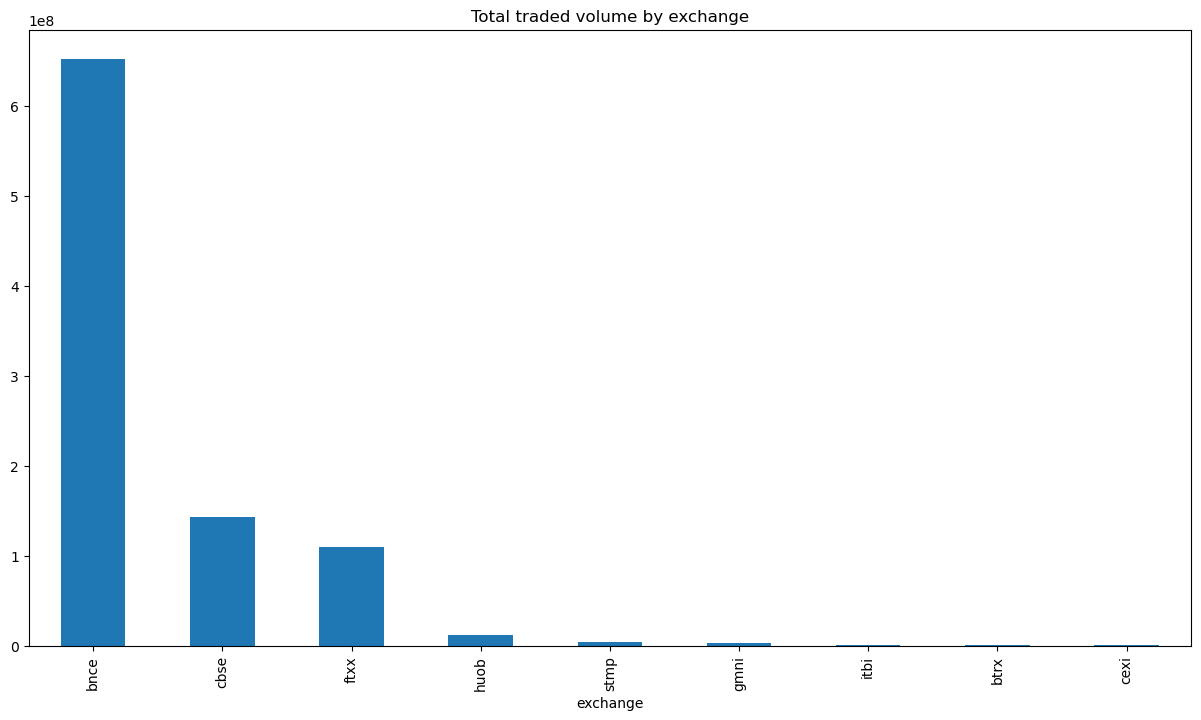

In [64]:
stats_vol_by_exch['sum'].sort_values(ascending=False).plot.bar(figsize = (15,8))
plt.title("Total traded volume by exchange")
plt.show()

### 2.3 Volume by pair

Create a DataFrame that for each pair contains the following statistics on the volume: *count*, *sum*, *mean*, *median*.

What are the 5 pairs with the largest:
- number of trades
- total volume


In [65]:
stats_vol_by_pair = df.groupby("pair").volume.agg(['count', 'sum', "mean", "median"])

In [66]:
stats_vol_by_pair

,count,sum,mean,median
pair,,,,
aave-usd,2843,8.803690e+05,309.661977,63.474600
aave-usdt,3238,9.448475e+05,291.799713,14.946600
ada-usd,2572,1.328328e+06,516.457390,200.027961
ada-usdt,4749,2.378887e+06,500.923718,54.755200
algo-usd,1065,1.996163e+05,187.433190,17.610320
...,...,...,...,...
xrp-usdt,13489,1.461218e+07,1083.266404,141.380066
xtz-usd,678,1.751276e+05,258.300269,51.819193
xtz-usdt,1524,5.196959e+05,341.007798,54.475850


In [67]:
# The 5 pairs with the largest number of trades are:
stats_vol_by_pair.nlargest(5, "count")

,count,sum,mean,median
pair,,,,
btc-usdt,422628,4.964425e+08,1174.655995,242.546412
eth-usdt,61248,1.070150e+08,1747.240237,468.730049
btc-usd,58365,9.186748e+07,1574.016653,107.346144
eth-usd,57908,1.119512e+08,1933.260047,499.999484
sol-usd,16746,8.435822e+06,503.751459,83.886840


In [68]:
# The 5 pairs with the largest total volume are:
stats_vol_by_pair.nlargest(5, "sum")

,count,sum,mean,median
pair,,,,
btc-usdt,422628,4.964425e+08,1174.655995,242.546412
eth-usd,57908,1.119512e+08,1933.260047,499.999484
eth-usdt,61248,1.070150e+08,1747.240237,468.730049
btc-usd,58365,9.186748e+07,1574.016653,107.346144
xrp-usdt,13489,1.461218e+07,1083.266404,141.380066


Are they the same pairs ? 

Find a way to evaluate the correlation between number of trades and total volume.

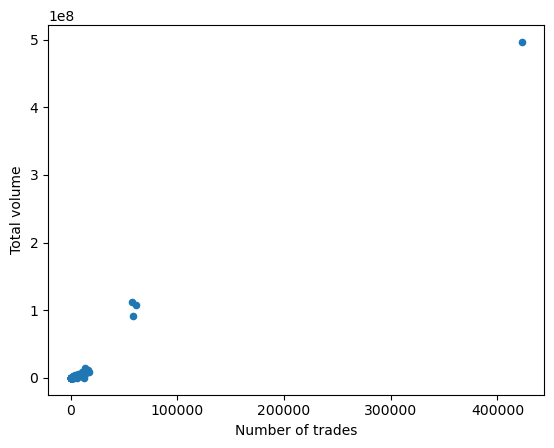

In [69]:
stats_vol_by_pair.plot.scatter('count', "sum")
plt.xlabel("Number of trades")
plt.ylabel("Total volume")
plt.show()

In [70]:
stats_vol_by_pair[['count', 'sum']].corr()

,count,sum
count,1.000000,0.991855
sum,0.991855,1.000000


For each exchange, get the best pair in terms of number of trades, then in terms of volume.

In [71]:
df.groupby(['exchange', 'pair']).volume.count()

exchange  pair     
bnce      aave-usdt    1909
          ada-usdt     3239
          algo-usdt    1086
          atom-usdt    4465
          avax-usdt    2592
                       ... 
stmp      usdc-usdt       4
          usdt-usd       84
          xlm-usd        46
          xrp-usd       347
          xrp-usdt       21
Name: volume, Length: 338, dtype: int64

In [72]:
df.groupby(['exchange', 'pair']).volume.count().unstack().idxmax(axis=1)

exchange
bnce     btc-usdt
btrx      btc-usd
cbse      btc-usd
cexi      eth-usd
ftxx      eth-usd
gmni      btc-usd
huob    flow-usdt
itbi      btc-usd
stmp      btc-usd
dtype: object

In [73]:
df.groupby(['exchange', 'pair']).volume.sum().unstack().idxmax(axis=1)

exchange
bnce    btc-usdt
btrx     xrp-usd
cbse     eth-usd
cexi     eth-usd
ftxx     eth-usd
gmni     btc-usd
huob    eth-usdt
itbi     btc-usd
stmp     eth-usd
dtype: object

For each pair, get the exchange where there are the most trades. In the following, we will name it "the best exchange" for a pair.

In [74]:
df.groupby(['exchange', 'pair']).volume.sum().unstack().idxmax(axis=0)

pair
aave-usd     cbse
aave-usdt    bnce
ada-usd      cbse
ada-usdt     bnce
algo-usd     cbse
             ... 
xrp-usdt     bnce
xtz-usd      cbse
xtz-usdt     bnce
zec-usd      cbse
zec-usdt     bnce
Length: 101, dtype: object

In [75]:
df.groupby(['exchange', 'pair']).volume.sum().unstack().idxmax(axis=0).value_counts()

bnce    47
cbse    34
ftxx    10
huob     5
btrx     3
gmni     2
dtype: int64

For how many pairs, is each exchange the best exchange. 

Display this result in a pie chart.

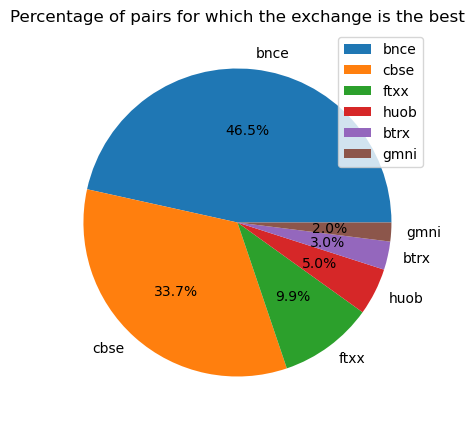

In [76]:
df.groupby(['exchange', 'pair']).volume.sum().unstack().idxmax(axis=0).value_counts().plot.pie(figsize = (15,5), autopct='%1.1f%%')
plt.legend()
plt.title("Percentage of pairs for which the exchange is the best")
plt.show()

## 3. Analysis by coin

Create two new columns *base* and *quote* based on the pair column. 

Reminder: in the pair X-Y, X is the base asset and Y is the quote asset.

In [77]:
df['base'] = df.pair.str.split('-').str[0]
df['quote'] = df.pair.str.split('-').str[1]

# or 
# df['base'] = df.pair.apply(lambda s: s.split("-")[0])
# df['quote'] = df.pair.apply(lambda s: s.split("-")[1])

In [78]:
df.head(5)

,timestamp,trade_id,price,amount,taker_side_sell,exchange,pair,volume,base,quote
0,2022-10-24 14:00:00.000000000,787987369.0,1348.35,0.03180,False,bnce,eth-usdt,42.877530,eth,usdt
1,2022-10-24 14:00:00.000000000,1730418307.0,19352.40,0.00099,True,bnce,btc-usdt,19.158876,btc,usdt
2,2022-10-24 14:00:00.000999936,1730418308.0,19352.40,0.00339,True,bnce,btc-usdt,65.604636,btc,usdt
3,2022-10-24 14:00:00.000999936,1730418309.0,19352.40,0.00077,True,bnce,btc-usdt,14.901348,btc,usdt
4,2022-10-24 14:00:00.001999872,1730418310.0,19352.40,0.00455,True,bnce,btc-usdt,88.053420,btc,usdt


Is there an intersection between bases and quotes? 

In [79]:
df.quote.unique()

array(['usdt', 'usd', 'usdc', 'dai'], dtype=object)

In [80]:
df.base.isin(df.quote.unique())

0         False
1         False
2         False
3         False
4         False
          ...  
848310    False
848311    False
848312    False
848313    False
848314    False
Name: base, Length: 848315, dtype: bool

In [81]:
df[df.base.isin(df.quote.unique())].base.unique()

array(['usdc', 'usdt', 'dai'], dtype=object)

Answer the following questions:
- Which exchange has the most trades involving BTC? How many trades were executed on this platform? 

In [82]:
df[df.base == "btc"].groupby(['exchange']).price.count().nlargest(1)

exchange
bnce    413117
Name: price, dtype: int64

- What is the total volume traded (all exchanges combined) of the 5 most traded assets? 

In [83]:
# Step 1, finds the most traded assets
most_traded_assets = df.groupby(['base']).price.count().nlargest(5).index

In [84]:
# Step 2, filter on these assets and get the total volume traded
df[df.base.isin(most_traded_assets)].groupby(['base']).volume.sum()

base
btc      5.888033e+08
eth      2.194189e+08
matic    1.128987e+07
sol      2.042640e+07
xrp      1.889680e+07
Name: volume, dtype: float64

## 4. Time analysis

Construct a new DataFrame indexed by minute containing the number of trades (by minute) and the total volume traded (by minute), both on all exchanges combined.

In [85]:
df.resample('1Min', on='timestamp').volume

In [86]:
info_by_min = df.resample('1Min', on='timestamp').volume.agg(['count', 'sum'])
info_by_min.rename(columns = {'count':"TradeNb", "sum":"TotalVolume"}, inplace = True)
info_by_min.head()

,TradeNb,TotalVolume
timestamp,,
2022-10-24 14:00:00,15802,1.704627e+07
2022-10-24 14:01:00,13199,1.251803e+07
2022-10-24 14:02:00,15177,1.564351e+07
2022-10-24 14:03:00,14494,1.430609e+07
2022-10-24 14:04:00,11889,1.116534e+07


On the same graph, display minute by minute:
- the evolution of the number of trades
- the evolution of the total volume traded 

You may use different ordinates axes if needed. 

Is there a minute that is significantly different from the others? Which one is it?

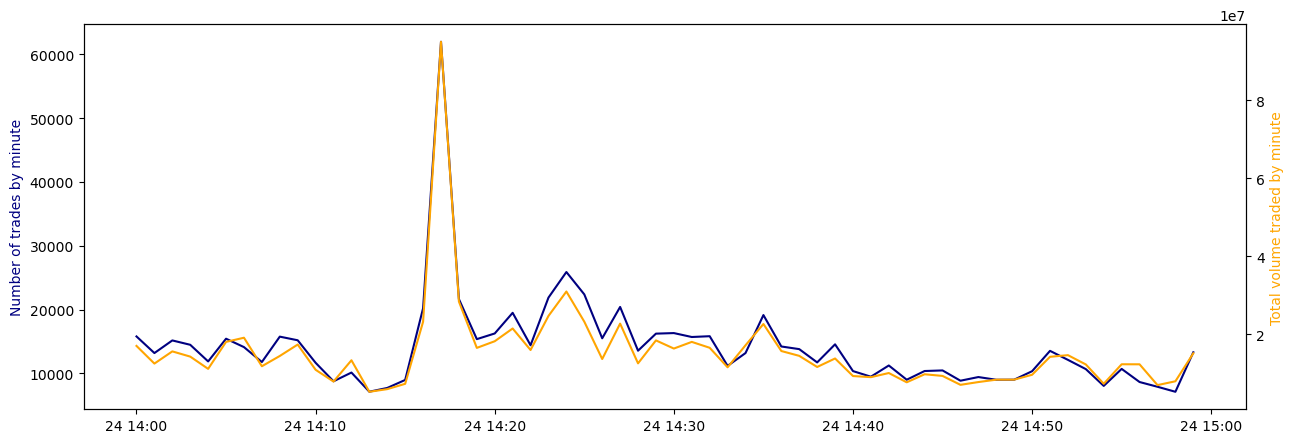

In [87]:
fig = plt.figure(figsize = (15,5))

ax = plt.gca()
ax.plot(info_by_min.index, info_by_min.TradeNb, color = 'navy')
ax.set_ylabel("Number of trades by minute", color = 'navy')

ax2=ax.twinx()
ax2.plot(info_by_min.index, info_by_min.TotalVolume, color = 'orange')
ax2.set_ylabel("Total volume traded by minute", color = "orange")

plt.xlabel("Time")
plt.show()

In a new DataFrame, get the same information (number of trades and total volume traded) indexed by minute and by exchange.

In [88]:
info_by_min_by_exch = df.groupby([pd.Grouper(key="timestamp", freq = "1Min", convention = 'e'), 'exchange']).volume.agg(['count', 'sum'])
info_by_min_by_exch.rename(columns = {'count':"TradeNb", "sum":"TotalVolume"}, inplace = True)
info_by_min_by_exch.head()

TradeNb   TotalVolume
timestamp           exchange                       
2022-10-24 14:00:00 bnce        10735  1.282346e+07
                    btrx            8  1.492532e+03
                    cbse         2211  2.380602e+06
                    cexi           25  4.158272e+03
                    ftxx         1281  1.472520e+06

Display in a single graph the evolution of the number of trades minute by minute for each exchange.

In [96]:
info_by_min_by_exch.TradeNb.unstack().head()

exchange,bnce,btrx,cbse,cexi,ftxx,gmni,huob,itbi,stmp
timestamp,,,,,,,,,
2022-10-24 14:00:00,10735.0,8.0,2211.0,25.0,1281.0,53.0,1378.0,71.0,40.0
2022-10-24 14:01:00,8759.0,11.0,2297.0,9.0,901.0,41.0,1111.0,55.0,15.0
2022-10-24 14:02:00,9566.0,12.0,2749.0,39.0,1269.0,72.0,1392.0,56.0,22.0
2022-10-24 14:03:00,9245.0,23.0,2572.0,24.0,1194.0,53.0,1316.0,52.0,15.0
2022-10-24 14:04:00,7443.0,3.0,2153.0,5.0,1100.0,49.0,1063.0,56.0,17.0


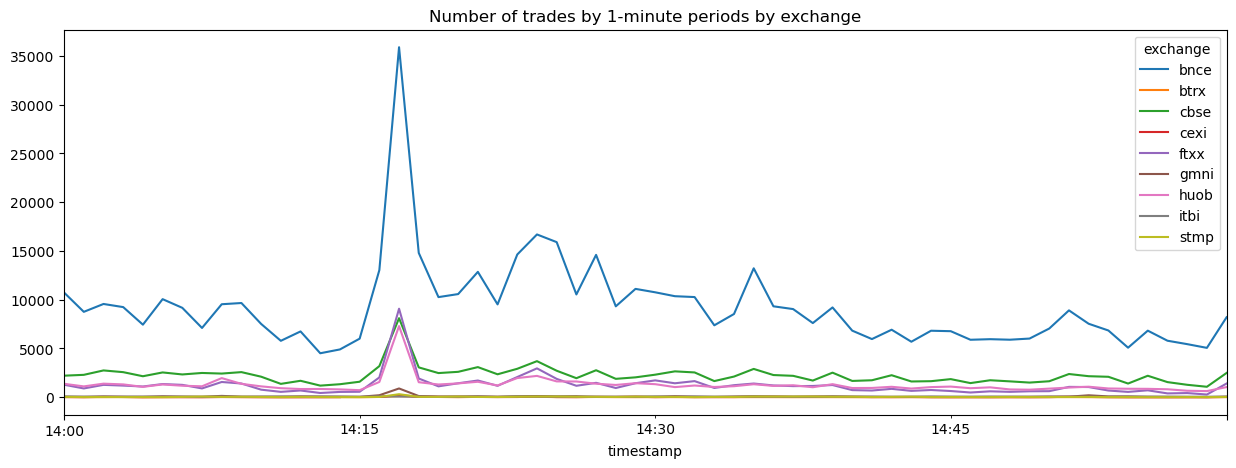

In [89]:
info_by_min_by_exch.TradeNb.unstack().plot(figsize = (15,5))
plt.title("Number of trades by 1-minute periods by exchange")
plt.show()

Do the same for the evolution of the total volume traded.

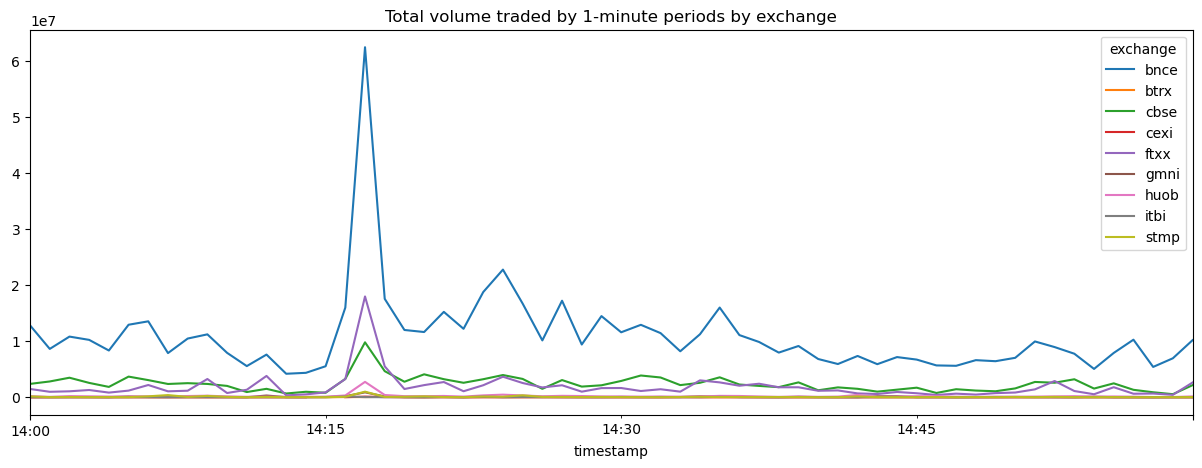

In [90]:
info_by_min_by_exch.TotalVolume.unstack().plot(figsize = (15,5))
plt.title("Total volume traded by 1-minute periods by exchange")
plt.show()

For the 5 most traded assets (that we have retrieved earlier), display the evolution of the total traded volume per seconds.

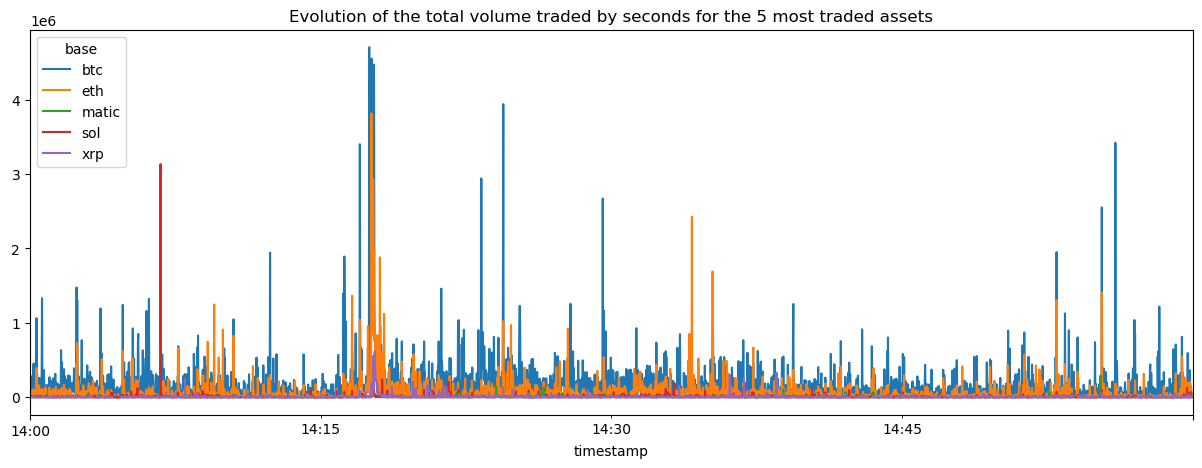

In [91]:
df_filtered = df[df.base.isin(most_traded_assets)]
volume_by_sec_by_base = df_filtered.groupby([pd.Grouper(key="timestamp", freq = "1s", convention = 'e'), 'base']).volume.sum()
volume_by_sec_by_base.unstack().plot(figsize = (15,5))
plt.title("Evolution of the total volume traded by seconds for the 5 most traded assets")
plt.show()

For each quote asset, display the evolution of the total traded volume minute by minute.

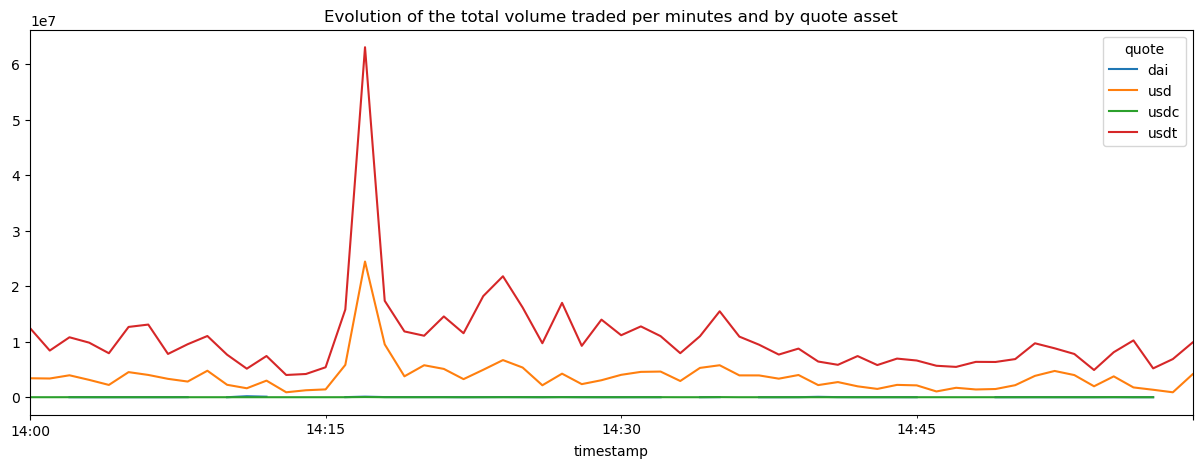

In [100]:
volume_by_sec_by_quote = df_filtered.groupby([pd.Grouper(key="timestamp", freq = "1Min", convention = 'e'), 'quote']).volume.sum()
volume_by_sec_by_quote.unstack().plot(figsize = (15,5))
plt.title("Evolution of the total volume traded per minutes and by quote asset")
plt.show()

In [99]:
volume_by_sec_by_quote.unstack().head()

quote,dai,usd,usdc,usdt
timestamp,,,,
2022-10-24 14:00:00,6692.750523,3.417562e+06,2372.385324,1.244727e+07
2022-10-24 14:01:00,NaN,3.372747e+06,831.607721,8.405704e+06
2022-10-24 14:02:00,4744.387380,3.951841e+06,6263.748562,1.080003e+07
2022-10-24 14:03:00,2098.594769,3.124197e+06,3160.977568,9.830299e+06
2022-10-24 14:04:00,1425.852145,2.213819e+06,579.063689,7.924678e+06


Do you notice anything particular about the DAI? 

In [93]:
# It is sometimes not traded during more than one minute.

In [102]:
volume_by_sec_by_quote.unstack().notnull().head()

quote,dai,usd,usdc,usdt
timestamp,,,,
2022-10-24 14:00:00,True,True,True,True
2022-10-24 14:01:00,False,True,True,True
2022-10-24 14:02:00,True,True,True,True
2022-10-24 14:03:00,True,True,True,True
2022-10-24 14:04:00,True,True,True,True


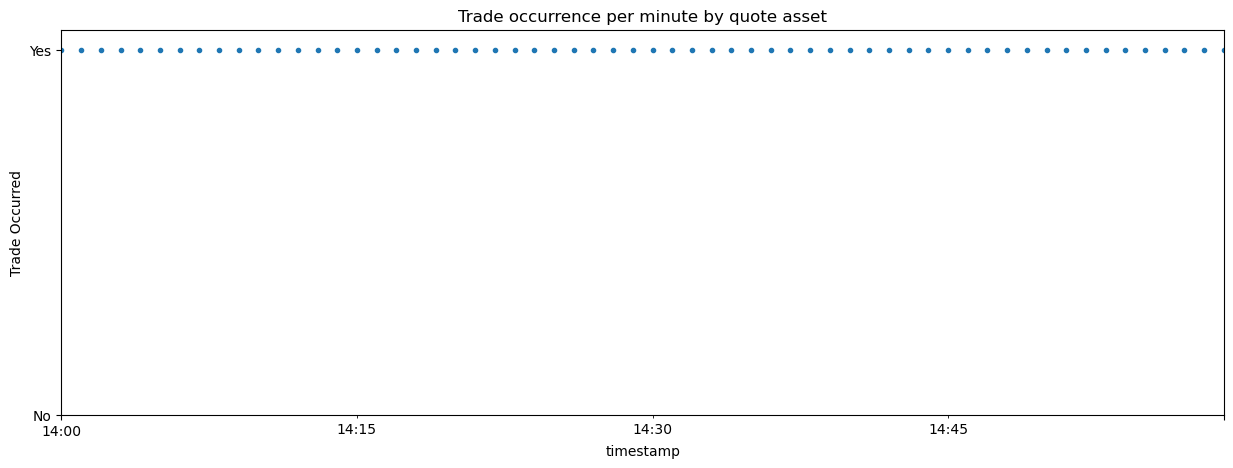

In [109]:
binary_volume_by_sec_by_quote = volume_by_sec_by_quote.unstack().usdt.notnull().astype(int)
binary_volume_by_sec_by_quote.plot(style='.', figsize=(15, 5))
plt.title("Trade occurrence per minute by quote asset")
plt.ylabel('Trade Occurred')
plt.yticks([0, 1], ["No", "Yes"])
plt.show()